In [64]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import xlrd
from xlwt import Workbook, Formula
import pandas

## 27.11.Results Analysis


In [65]:
#df = pd.read_csv('Map_XY.csv', names = ['Fx','Fy','Fz','Tx','Ty','Tz','else'])
df = pd.read_excel("27.11.Forces.xlsx",names = ['Fx','Fy','Fz','Tx','Ty','Tz','else'])
df2 = pd.read_excel("27.11.Positions.xlsx", names = ["Time",'nan','X','Y','Z'])
df2 = df2.drop(['nan'], axis=1)
df2 = df2.dropna()
df

,Fx,Fy,Fz,Tx,Ty,Tz,else
0,0.005,0.016,0.000,-0.088,-0.051,-0.029,14917.0
1,0.007,0.020,0.002,-0.092,-0.032,-0.001,15116.0
2,0.000,0.013,0.005,-0.104,-0.009,-0.011,15116.0
3,0.000,0.013,0.007,-0.160,-0.026,-0.067,15316.0
4,0.000,0.010,0.000,-0.050,-0.001,-0.019,15316.0
...,...,...,...,...,...,...,...
2274,-0.039,0.207,0.037,-4.175,-0.796,0.080,242321.0
2275,-0.039,0.205,0.027,-4.148,-0.804,0.071,242521.0
2276,-0.041,0.204,0.030,-4.156,-0.807,0.080,242521.0
2277,-0.039,0.205,0.025,-4.134,-0.813,0.099,242721.0


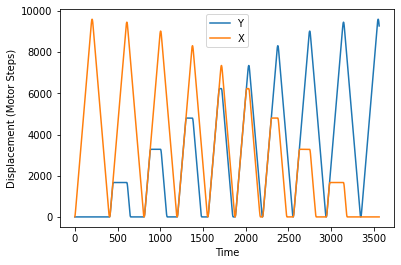

In [66]:
plt.plot(df2['Y'], label = 'Y')
plt.plot(-df2['X'], label = 'X')
plt.xlabel('Time')
plt.ylabel('Displacement (Motor Steps)')
plt.legend(loc='best')
plt.show()

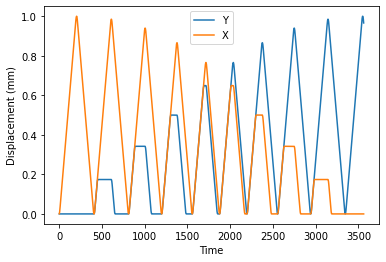

In [67]:
plt.plot(df2['Y']/9600, label = 'Y')
plt.plot(-df2['X']/9600, label = 'X')
plt.xlabel('Time')
plt.ylabel('Displacement (mm)')
plt.legend(loc='best')
plt.show()

In [68]:
df2['Y'].max()
df['Fy'].max()
df[['Fy']].idxmax() #=1568
df.iloc[1568, :]


Fx          -0.056
Fy           0.272
Fz           0.024
Tx          -5.561
Ty          -1.418
Tz          -0.173
else    171719.000
Name: 1568, dtype: float64

0.272


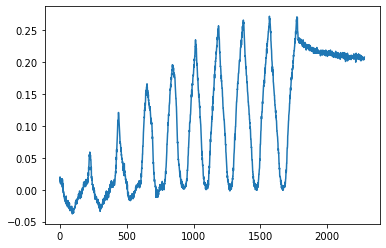

In [69]:
print(df['Fy'].max())
plt.plot(df['Fy'])
plt.show()

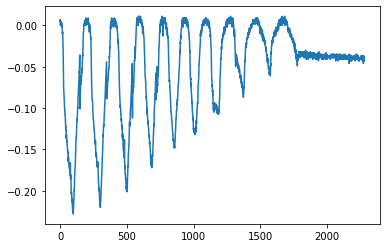

In [70]:
plt.plot(df['Fx'])

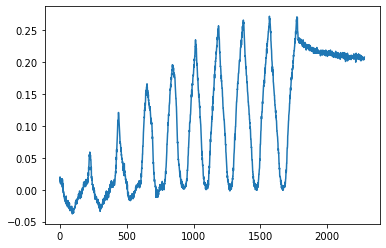

In [71]:
plt.plot(df['Fy'])

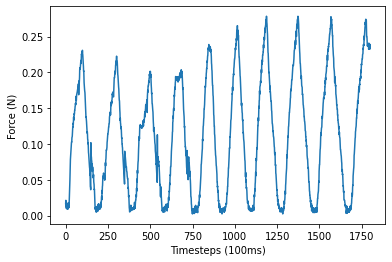

In [72]:
df['Force'] = (df['Fx']*df['Fx']+df['Fy']*df['Fy'])**0.5
plt.plot(df['Force'][:1800])
plt.ylabel('Force (N)')
plt.xlabel('Timesteps (100ms)')
plt.show()

a = (np.linspace(0,1798,11))
a = a.astype(int)
b=[]
for i in range(len(a)-1):
    b.append(df['Force'][a[i]:a[i+1]].max())

In [73]:
b = b[:7]

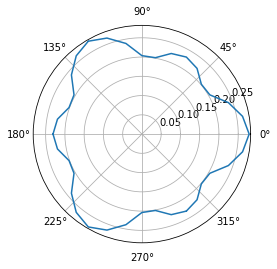

In [74]:
alpha = np.linspace(np.pi,2*np.pi/3,7)
alpha2 = np.concatenate([alpha,alpha-np.pi/3,alpha-2*np.pi/3,alpha-3*np.pi/3,alpha-4*np.pi/3,alpha-5*np.pi/3])
b2 = np.concatenate([b,np.flip(b),b,np.flip(b),b,np.flip(b)])

plt.polar(alpha2,b2)
plt.show()

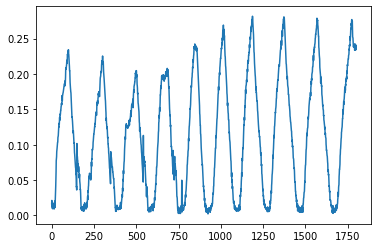

In [75]:
df['Force2'] = (df['Fx']*df['Fx']+df['Fy']*df['Fy']+df['Fz']*df['Fz'])**0.5
plt.plot(df['Force2'][:1800])

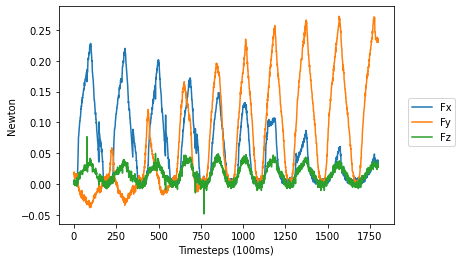

In [76]:

plt.plot(np.abs(df['Fx'][:1800]), label = 'Fx')
plt.plot(df['Fy'][:1800], label = 'Fy')
plt.plot(df['Fz'][:1800], label = 'Fz')
plt.legend(bbox_to_anchor=(1.2,0.6))
plt.xlabel('Timesteps (100ms)')
plt.ylabel('Newton')
plt.show()

In [62]:
# REAL TIME READING

from time import sleep
import serial
ser = serial.Serial('/dev/cu.usbmodem14201', 2000000) # Establish the connection on a specific port
counter = 32 # Below 32 everything in ASCII is gibberish
Times = []
PosX = []
PosY = []
PosZ = []
while True:
    intro = ser.readline()
    if intro[0:-2].decode("utf-8") == 'GO':
        a = ser.readline()
        Times.append(a[0:-2].decode("utf-8"))
        b = ser.readline()
        PosX.append(b[0:-2].decode("utf-8"))
        c = ser.readline()
        PosY.append(c[0:-2].decode("utf-8"))
        d = ser.readline()
        PosZ.append(d[0:-2].decode("utf-8"))
 # Convert the decimal number to ASCII then send it to the Arduino# Read the newest output from the Arduino
    sleep(.01) # Delay for one tenth of a second

         
         


KeyboardInterrupt: 

In [63]:
#DEALING WITH DATA, NOT IMPLEMENTED YET IN REAL TIME LOOP
for i in range(len(Times)):
    Times[i] = int(Times[i])
    PosX[i] = -int(PosX[i])
    PosY[i] = int(PosY[i])
    
data = pd.DataFrame([Times,PosX,PosY,PosZ])
data=data.T
data.columns = ['Time','PosX','PosY','PosZ']

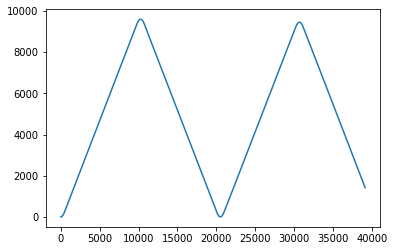

In [64]:
plt.plot(Times,PosX)

In [53]:
data.to_excel("01.12_Positions.xlsx") #SAVING TO EXTERNAL EXCEL FILE

In [41]:
help(sleep)

Help on built-in function sleep in module time:

sleep(...)
    sleep(seconds)
    
    Delay execution for a given number of seconds.  The argument may be
    a floating point number for subsecond precision.



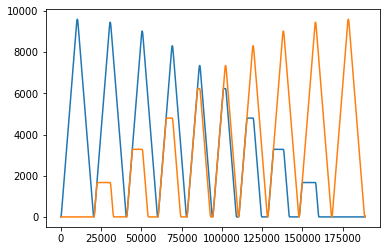

In [19]:
plt.plot(data['Time'], np.abs(data['PosX']))
plt.plot(data['Time'], data['PosY'])

In [76]:
data

,Time,PosX,PosY,PosZ
0,0,0,0,0
1,100,-12,0,0
2,200,-44,0,0
3,300,-95,0,0
4,400,-167,0,0
...,...,...,...,...
1879,188684,0,29,0
1880,188784,0,5,0
1881,188844,0,0,0
1882,188944,0,12,0


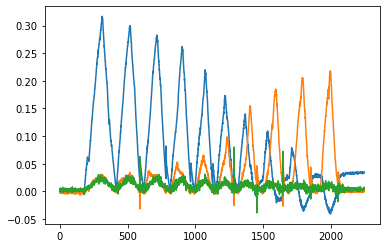

In [34]:
df = pd.read_excel("01.12.Forces.xlsx",names = ['Fx','Fy','Fz','Tx','Ty','Tz','else'])
plt.plot(df['Fx'])
plt.plot(-1*df['Fy'])
plt.plot(df['Fz'])

In [117]:
#177

df = df.iloc[176:]
df = df.reset_index()

#1878 identified
df = df[:1878]

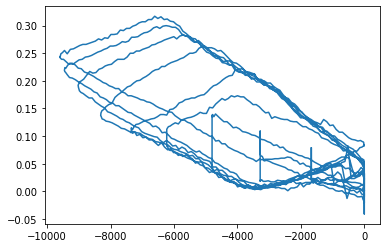

In [122]:
plt.plot(PosX[:1878], df['Fx'])

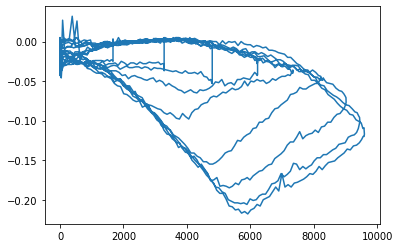

In [126]:
plt.plot((PosY[:1878]),df['Fy'])

In [ ]:
from time import sleep
import serial
ser = serial.Serial('/dev/cu.usbmodem14101', 2000000) # Establish the connection on a specific port
counter = 32 # Below 32 everything in ASCII is gibberish
Times = []
PosX = []
PosY = []
PosY = []
while True:
    try:
        ser_bytes = ser.readline()
        
        try:
            decoded_bytes = float(ser_bytes[0:len(ser_bytes)-2].decode("utf-8"))
            print(decoded_bytes)

In [ ]:
a = b'48243\r\n'
a[0:-2].decode("utf-8")

In [ ]:
a = b'00;0;0;\r\n'

In [ ]:
a[1:2].decode("utf-8")